# (Medical Appoinments No Shows Data Exploration)
## by (Yasmina Ayman)

## Preliminary Wrangling

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment depents on the patients helath condition and many other variables.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
# load in the dataset into a pandas dataframe
appointments = pd.read_csv('Medical Appointment No Shows.csv')
appointments.head(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
#overview of data shape
appointments.shape

(110527, 14)

In [4]:
#overview of data information and types
appointments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# descriptive statistics for numeric variables
appointments.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### What is the structure of your dataset?

> There are 110527 appointments in the dataset with 14 features. Most variables are numeric in nature, but the variables Gender, Neigbourhood, and No-show are categorical variables.

### What is/are the main feature(s) of interest in your dataset?

> I'm most interested in figuring out what features are best for predicting whether or not patients show up for their appointment.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that helth condition, age and appointment day will have the strongest effect on the patient attendance.

## Data Cleaning

**should be done for data cleaning and analysis:**
- Drop row that contain age with negative value
- Drop `PatientId` and `AppointmentID` columns as they are irrelevant to the analysis process
- Replace the values Yes-No in the column `No-show` with zeros and ones
- Rename columns `No-show` to `Attendance`, `Handcap` to `Handicap` and `Hipertension` to `Hypertension`
- convert type of `ScheduleDay` and `AppointmentDaycolumns` to datetime
- Create new columns for `Appointment weekday` and `waiting time`

### 1. Clean `Age` column 

In [6]:
# see how many records have negative value 
appointments.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [7]:
#drop the row tht contains negative age
appointments = appointments.drop(appointments.query('Age < 0').index)

### 2. Drop `PatientId` and `AppointmentID` columns

In [8]:
appointments.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

### 3. Replace the values Yes-No in the column `No-show` with zeros and ones

> Replace each `Yes` with `0` and `No` with `1` <br> `Yes` here means the patient didn't show up to the appointment and `No` means that the patient showed up to the appointment

In [9]:
appointments['No-show'].replace(['Yes','No'], [0,1], inplace=True)

### 4. Rename columns `No-show` to `Attendance`, `Handcap` to `Handicap` and `Hipertension` to `Hypertension`

In [10]:
appointments.rename(columns={'No-show':'Attendance', 'Handcap':'Handicap', 'Hipertension':'Hypertension'}, inplace=True)

### 5. convert type of `ScheduleDay` and `AppointmentDaycolumns` to datetime

> Just the date will be extracted because the time in `AppointmentDay` column is missing

In [11]:
#convert the columns to datetime
appointments['ScheduledDay'] = pd.to_datetime(appointments['ScheduledDay'])
appointments['AppointmentDay'] = pd.to_datetime(appointments['AppointmentDay'])

In [12]:
#get the date only from 'ScheduleDay' and 'AppointmentDay' columns
appointments['ScheduledDay'] = appointments['ScheduledDay'].apply(lambda x: x.strftime('%D'))
appointments['AppointmentDay'] = appointments['AppointmentDay'].apply(lambda x: x.strftime('%D')) 
appointments['AppointmentDay'] =pd.to_datetime(appointments['AppointmentDay']) 
appointments['ScheduledDay'] =pd.to_datetime(appointments['ScheduledDay'])

### 6. Create new columns for Appointment weekday and waiting time

In [13]:
#extract weekday from the `AppointmentDay` column
appointments['AppointmentWeekDay'] = appointments['AppointmentDay'].apply(lambda x: x.strftime('%A'))

In [14]:
#get the waiting time from `AppointmentDay` and `ScheduleDay` columns
appointments['WaitingTime'] = appointments['AppointmentDay'] - appointments['ScheduledDay']

In [15]:
appointments['WaitingTime'].describe()

count                        110526
mean     10 days 04:24:39.789370826
std      15 days 06:07:14.979140739
min               -6 days +00:00:00
25%                 0 days 00:00:00
50%                 4 days 00:00:00
75%                15 days 00:00:00
max               179 days 00:00:00
Name: WaitingTime, dtype: object

**Since it is impossible to get waiting days by negative amount so the records with negative value will be droped**

In [16]:
negative_waiting_time = appointments[appointments['WaitingTime'] < "0 days "]
negative_waiting_time

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,AppointmentWeekDay,WaitingTime
27033,M,2016-05-10,2016-05-09,38,RESISTÊNCIA,0,0,0,0,1,0,0,Monday,-1 days
55226,F,2016-05-18,2016-05-17,19,SANTO ANTÔNIO,0,0,0,0,1,0,0,Tuesday,-1 days
64175,F,2016-05-05,2016-05-04,22,CONSOLAÇÃO,0,0,0,0,0,0,0,Wednesday,-1 days
71533,F,2016-05-11,2016-05-05,81,SANTO ANTÔNIO,0,0,0,0,0,0,0,Thursday,-6 days
72362,M,2016-05-04,2016-05-03,7,TABUAZEIRO,0,0,0,0,0,0,0,Tuesday,-1 days


In [17]:
appointments.drop(negative_waiting_time.index, inplace=True)

In [18]:
#to reset the index
appointments.reset_index(drop=True, inplace=True)

In [19]:
#extract the number of the days only
appointments['WaitingTime'] = appointments['WaitingTime'].apply(lambda x: x.days)

In [20]:
appointments['WaitingTime'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: WaitingTime, dtype: float64

### 7. Drop columns that not needed anymore

In [21]:
appointments.drop(['ScheduledDay','AppointmentDay'], axis=1, inplace=True)

## Data after Pre-processing

In [22]:
appointments.head(10)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,Attendance,AppointmentWeekDay,WaitingTime
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,1,Friday,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,1,Friday,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,1,Friday,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,1,Friday,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,1,Friday,0
5,F,76,REPÚBLICA,0,1,0,0,0,0,1,Friday,2
6,F,23,GOIABEIRAS,0,0,0,0,0,0,0,Friday,2
7,F,39,GOIABEIRAS,0,0,0,0,0,0,0,Friday,2
8,F,21,ANDORINHAS,0,0,0,0,0,0,1,Friday,0
9,F,19,CONQUISTA,0,0,0,0,0,0,1,Friday,2


In [23]:
#get a copy from the cleaned data
appointments_copy = appointments.copy()

## Univariate Exploration

### 1. Number of patients attended their appointments and others who missed their appointments

In [24]:
def myCountPlot(df, xVar, xticks, base_color):
    '''
    This function for visualizing the bar charts without repeat the code many times
    '''
    # set plot dimensions
    plt.figure(figsize=[14.70, 8.27])
    sb.countplot(data=df, x=xVar, palette=base_color)
    
    #titles/labels/xticks
    plt.xticks([1,0],xticks)
    #Add title and format it
    plt.title(f'Distribution of {xVar}'.title(), fontsize=14, weight="bold")
    #Add x label and format it
    plt.xlabel(xVar.title(), fontsize=10, weight="bold")
    #Add y label and format it
    plt.ylabel("Number of Patients".title(), fontsize=10, weight="bold")

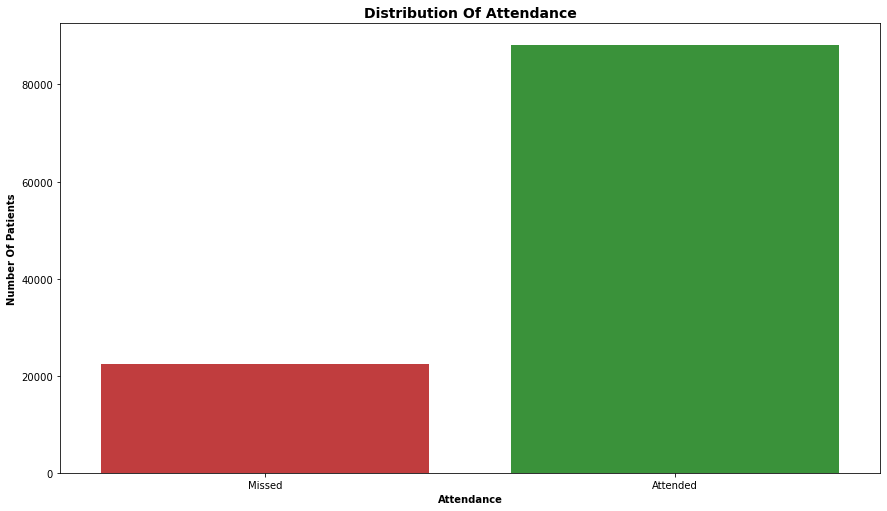

In [25]:
base_color = [sb.color_palette()[3], sb.color_palette()[2]]
xticks= ['Attended','Missed']
myCountPlot(appointments, 'Attendance', xticks, base_color)

The number of patients attended their appointments is so far more than who missed.

### 2. Number of patients that had a scholarship or not

> Scholarship is a financial aid to poor families in Brazil.

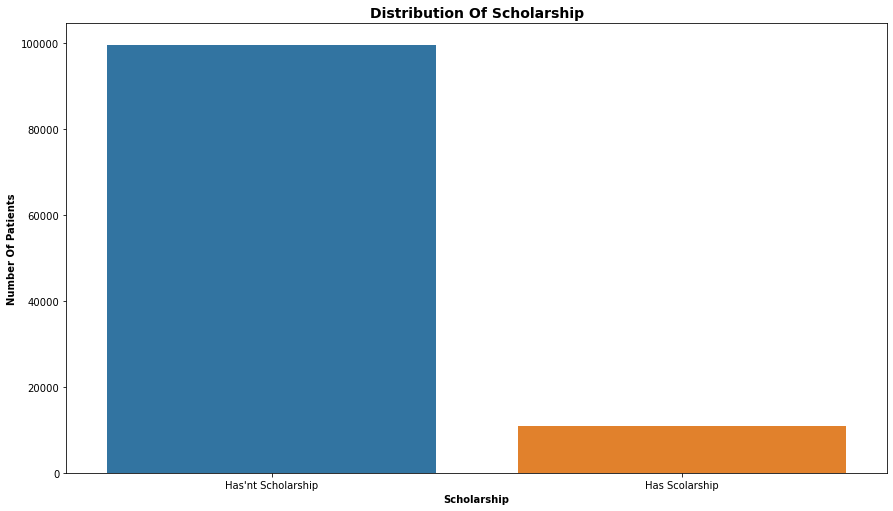

In [26]:
fig_color = [sb.color_palette()[0], sb.color_palette()[1]]
xticks = ['Has Scolarship', "Has'nt Scholarship"]
myCountPlot(appointments,'Scholarship',xticks, fig_color)

Most of patients don't have a scholarship. 

### 3. Distribution of gender in the dataset

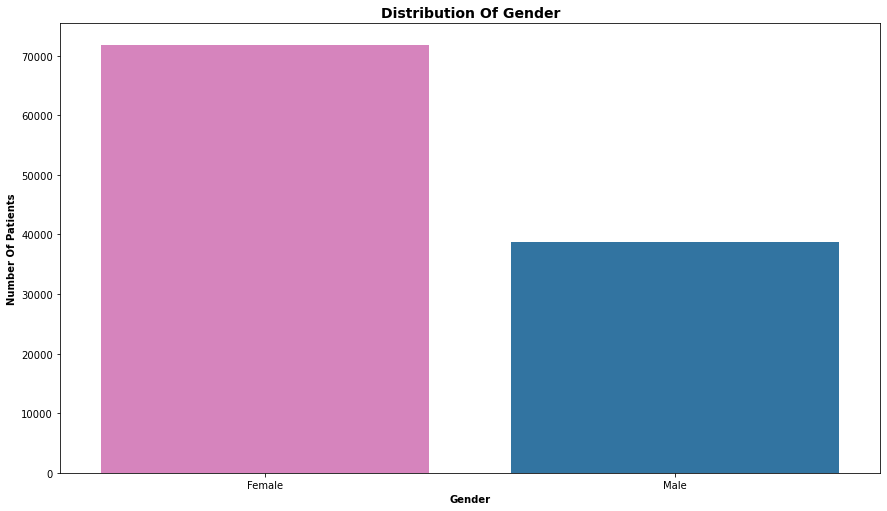

In [27]:
gender_color = [sb.color_palette()[6], sb.color_palette()[0]]
xticks = ["Male", "Female"]
myCountPlot(appointments, 'Gender', xticks,gender_color)

Most of the appointment is Females not males in the dataset.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

There are no any unusual points. We found that most of the appointments is registered by females so they cared by their health more than males. Most patients didn't have a scholarship and despite of that most of them attended their appointments.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

I just converted the values in column of `Attendance` or `No-show` from `Yes-No` to `1-0` yto be more easy in the visualization process. 

## Bivariate Exploration

### 1. Does the waiting time for the appointment affect the attendance?

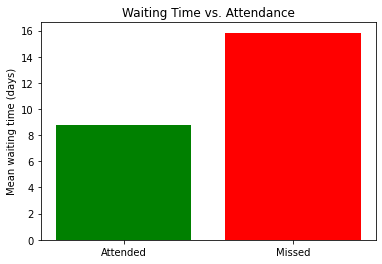

In [28]:
waiting_time_mean = appointments.groupby('Attendance')['WaitingTime'].mean()
plt.bar([1,0],waiting_time_mean, color=['red','green'])
plt.title("Waiting Time vs. Attendance")
plt.xticks([1,0],['Missed','Attended'])
plt.ylabel("Mean waiting time (days)");

So that shows if the patient waits more than a week, he may miss his appointment.

### 2. What effect does the Neighbourhood have on attendance?

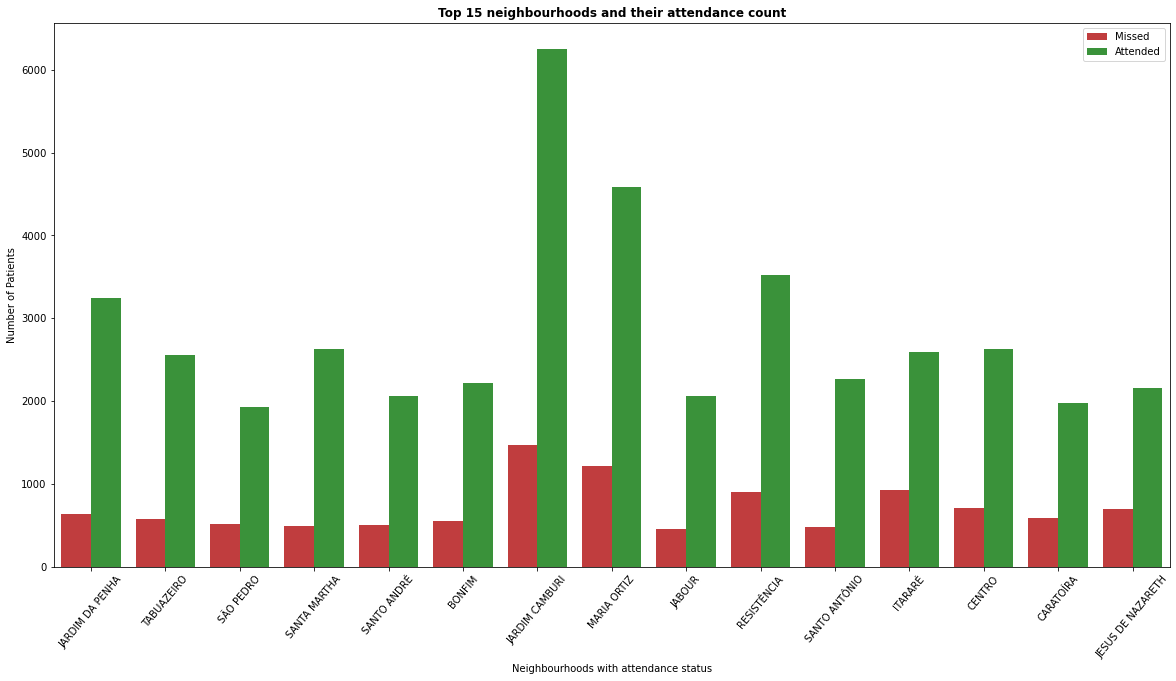

In [29]:
#get the names of the first 15 top places only
top_neighbourhood = appointments['Neighbourhood'].value_counts().index[:15]
top_neighbourhood_data = appointments.query('Neighbourhood in @top_neighbourhood')[['Neighbourhood','Attendance']]
plt.figure(figsize=(20,10))
sb.countplot(data=top_neighbourhood_data, x='Neighbourhood', hue='Attendance', palette=base_color)
plt.xticks(rotation=50)
plt.legend(labels=['Missed','Attended'])
plt.title("Top 15 neighbourhoods and their attendance count", weight='bold')
plt.ylabel("Number of Patients")
plt.xlabel("Neighbourhoods with attendance status");

We can notic efrom the bar plot that most of the patients attended in `JADIM CAMBURI` AND `MARIA ORTIZ`

### 3. Is reminding the patients with an SMS help them to attend?

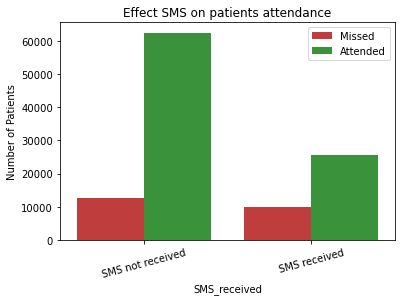

In [30]:
sb.countplot(data=appointments, x='SMS_received', hue='Attendance', palette=base_color)
plt.legend(labels=['Missed','Attended'])
plt.xticks([0,1],['SMS not received','SMS received'], rotation=15)
plt.title("Effect SMS on patients attendance")
plt.ylabel("Number of Patients");

The number of patients attended is more than those missed either they receive an SMS or not so the SMS doesn't really help patients to attend.

### 4. Relation between the attendance and tha gender of the patient

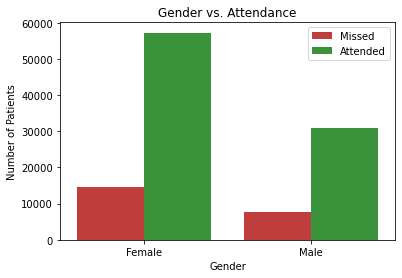

In [31]:
sb.countplot(data=appointments, x='Gender', hue='Attendance', palette=base_color)
plt.legend(labels=['Missed','Attended'])
plt.title("Gender vs. Attendance")
plt.xticks([0,1],['Female','Male'])
plt.ylabel("Number of Patients");

Number of females who attended their appointments is heighr than the number of males.

### 5. What effect does Scholarship have on attendance?

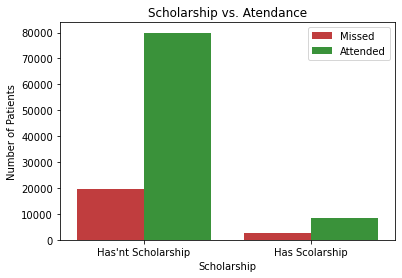

In [32]:
sb.countplot(data=appointments, x='Scholarship', hue='Attendance', palette=base_color)
plt.legend(labels=['Missed','Attended'])
plt.xticks([0,1],["Has'nt Scholarship",'Has Scolarship'])
plt.title("Scholarship vs. Atendance")
plt.ylabel("Number of Patients");

Patients with a scholarship constitute a small portion tend to have lower attendance mean than patients who haven't a scholarship.

### 6. Is the day on which the appointment is held affect the attendance?

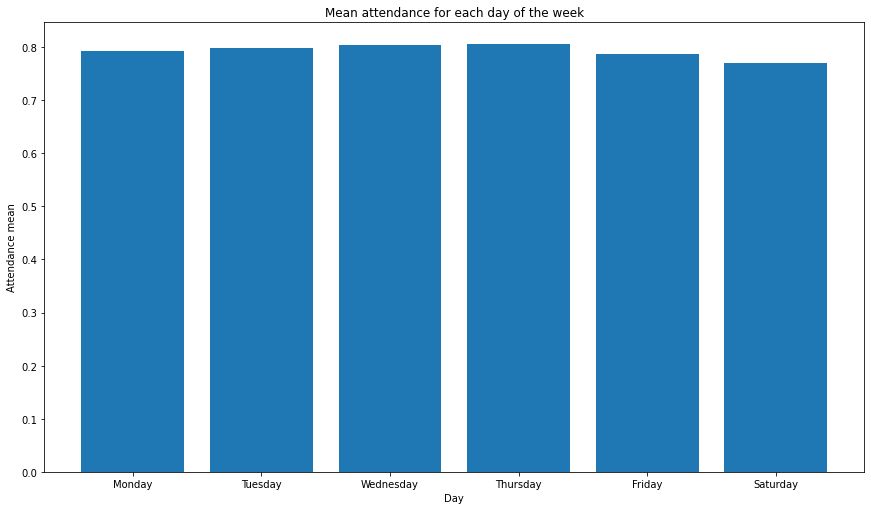

In [33]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
#reindex dataframe by dats in order
data = appointments.groupby(['AppointmentWeekDay'])['Attendance'].mean().reindex(day_order)

x = data.index
y = data
plt.figure(figsize=[14.70, 8.27])
plt.bar(x,y)
plt.title("Mean attendance for each day of the week")
plt.xlabel('Day')
plt.ylabel('Attendance mean');

Mean attendance across the week seems equal with slightely lower attendance mean in Saturdays.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- If the patient waits more than a week, the appointment wil be missed.
- Most of the patients prefer to attended in `JADIM CAMBURI` and `MARIA ORTIZ` 
- The number of patients attended is more than those missed either they receive an SMS or not so the SMS which means that the feature send an SMS doesn't really affect the attendance.
- Number of females who attende their appointment is larger than males but that due to that females have more appointments than males in the dataset.
- As most of the patients didn't have a scholarship but we can observe that who have a scholarship attended more their appointments and didn't miss them. 
- The dataset doesn't contain sundays in the weekday wich mean that may be a holiday, but attendance across the week seems equal.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There are no other interesting observations.

## Multivariate Exploration

### 1. Relation between the attendance and medical condition for the patient

In [34]:
condition=['Hypertension','Diabetes','Alcoholism','Handicap']

#health condition for patients who attended
health_data_attend = appointments.query('Attendance == 1')[['Hypertension','Diabetes','Alcoholism','Handicap','Attendance']]
labels_size1 = []
for i in condition:
    labels_size1.append(health_data_attend[i].sum())
    
#helath condition for patients who miised the appointment
health_data_miss = appointments.query('Attendance == 0')[['Hypertension','Diabetes','Alcoholism','Handicap','Attendance']]
labels_size2 = []
for i in condition:
    labels_size2.append(health_data_miss[i].sum())

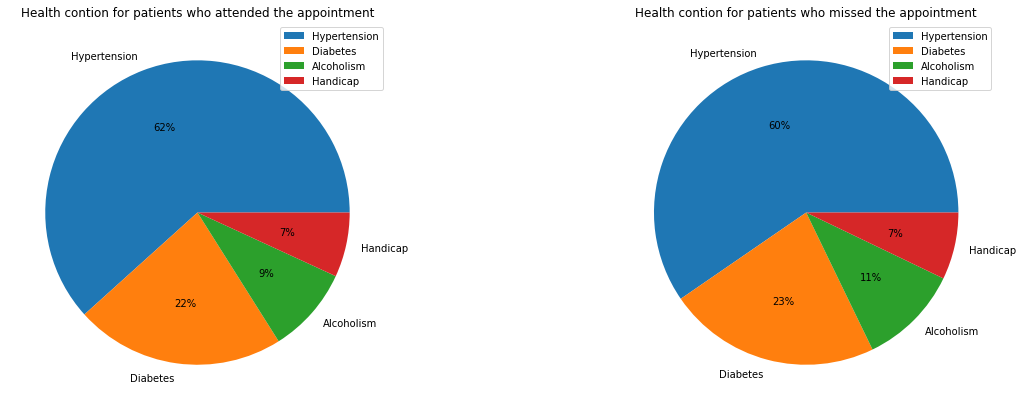

In [35]:
plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1) 
plt.pie(labels_size1, labels=condition, autopct='%.f%%')
plt.title("Health contion for patients who attended the appointment")
plt.legend();

plt.subplot(1, 2, 2)
plt.pie(labels_size2, labels=condition, autopct='%.f%%')
plt.title("Health contion for patients who missed the appointment")
plt.legend();

The health condition of the patient doesn't affect the attendance as we see pie charts, the percentages are approximately the same either the patient attended or not.

### 2. Relation between gender and waiting time vs patients attendance

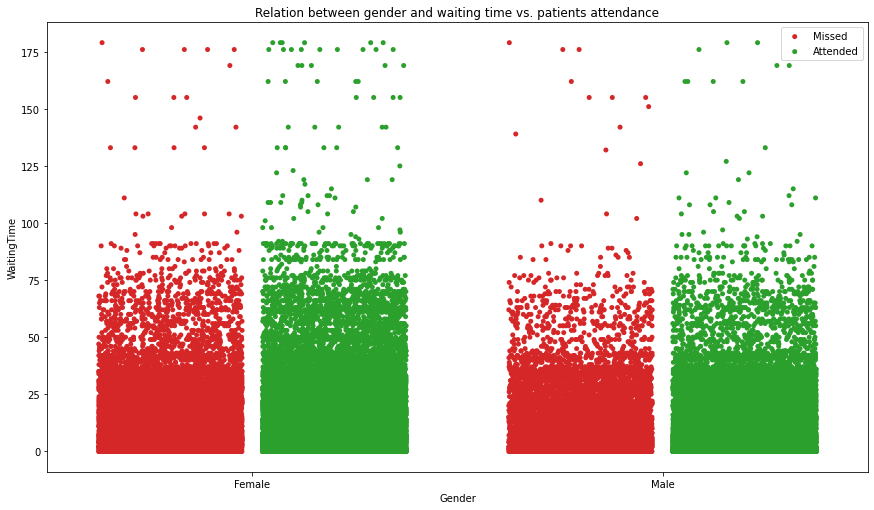

In [36]:
plt.figure(figsize=[14.70, 8.27])
fig_color = [sb.color_palette()[3], sb.color_palette()[2]]
sb.stripplot(data=appointments, x='Gender', y='WaitingTime', hue="Attendance",
            jitter=0.35, dodge=True, palette=fig_color)
plt.legend(labels=['Missed','Attended'])
plt.xticks([0,1],["Female","Male"])
plt.title("Relation between gender and waiting time vs. patients attendance");

It seems that the waiting time affect both genders attendance but the rate of attendance for females is a bit higher than males.

### 3. Distribution od ages for each gender who attended their appointments

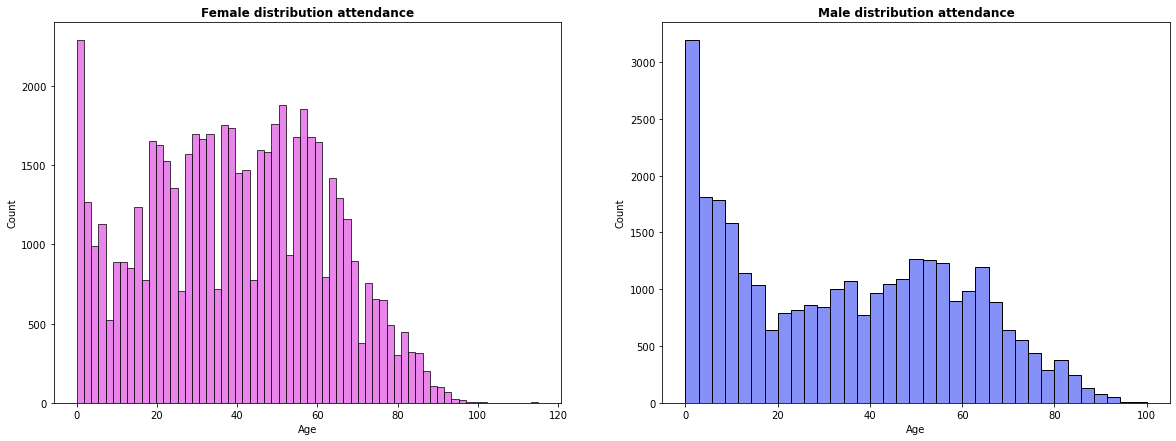

In [37]:
female_age = appointments.query('(Gender == "F") and (Attendance == 1)')['Age']
male_age = appointments.query('(Gender == "M") and (Attendance == 1)')['Age']

plt.figure(figsize = [20, 7])

plt.subplot(1, 2, 1)
sb.histplot(x= female_age, color='#E35CE6')
plt.title("Female distribution attendance", weight='bold')

plt.subplot(1, 2, 2)
sb.histplot(x= male_age, color='#5E6DF5')
plt.title("Male distribution attendance", weight='bold');

we can observe that the most patients are babies either they are females or males. In females distribution, most of patients are in range from 20 to 65.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As observed in the above bie charts there are a slightly difference between the health condition whether the patient attended the appointments or not so the health condition of the patients doesn't really affect the attendance.
we can also see how the waiting time for each gender can affect the attendance rate but the females has a higher attendance rate even if they waited more time.

### Were there any interesting or surprising interactions between features?

It's surprising that the health condition doesn't really affect the attendance of the patient as it predicted to affect the patients behaviour for attendance.